<a href="https://colab.research.google.com/github/chan-kh/Music-Sentiment-Analysis/blob/main/LSTM_2outputs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
import os
import datetime
from google.colab import drive

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.preprocessing import MinMaxScaler

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

from keras import layers
from keras.optimizers import RMSprop
from keras.layers import Bidirectional

from math import sqrt
from scipy.stats.stats import pearsonr, spearmanr
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [200]:
drive.mount("/content/drive")
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Sentiment/features_60frames_allsongs.csv')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,song_id,frame_num,zcr,rms,spectral_centroid,spectral_bandwidth,spectral_rolloff,spectral_contrast,spectral_flatness,melspectrogram,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,chroma_stft_0,chroma_stft_1,chroma_stft_2,chroma_stft_3,chroma_stft_4,chroma_stft_5,chroma_stft_6,chroma_stft_7,chroma_stft_8,chroma_stft_9,chroma_stft_10,chroma_stft_11,chroma_cqt_0,chroma_cqt_1,chroma_cqt_2,chroma_cqt_3,chroma_cqt_4,chroma_cqt_5,chroma_cqt_6,chroma_cqt_7,chroma_cqt_8,chroma_cqt_9,chroma_cqt_10,chroma_cqt_11,chroma_cens_0,chroma_cens_1,chroma_cens_2,chroma_cens_3,chroma_cens_4,chroma_cens_5,chroma_cens_6,chroma_cens_7,chroma_cens_8,chroma_cens_9,chroma_cens_10,chroma_cens_11,tonnetz_0,tonnetz_1,tonnetz_2,tonnetz_3,tonnetz_4,tonnetz_5,valence,arousal
0,2,0,0.157715,0.000011,5604.262879,3246.069688,9549.975586,18.349374,0.283305,0.000000,-636.134705,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.654255,0.699066,0.261531,0.874848,1.000000,0.333313,0.812421,0.488101,0.413135,0.640419,0.671442,0.490904,0.725918,0.250459,0.284098,0.647150,0.349017,0.147453,0.501239,0.074669,0.070883,0.633342,0.184297,0.136420,0.700169,0.030602,0.209675,0.828279,0.124886,0.257948,1.000000,0.071105,0.309559,0.798000,0.076693,0.276441,-0.134078,0.072852,-0.134683,0.086125,0.060471,0.042898,-0.073341,-0.109386
1,2,1,0.051758,0.096817,1443.667160,2057.611806,3036.181641,27.017306,0.003931,1.576688,-120.319748,129.464996,-4.253306,22.214062,8.163963,16.415987,15.152133,7.878392,-6.823561,-0.831550,-7.218902,-4.558928,-1.807601,12.948887,-9.162554,-3.758020,-5.506585,-1.227700,-4.439484,1.684063,0.528904,0.624552,0.263783,0.891966,0.850903,0.331133,1.000000,1.000000,0.408033,0.713866,0.681263,0.480444,0.245905,0.378263,0.278916,0.160639,0.397115,0.147040,0.285743,0.536704,0.072041,0.314144,0.652729,0.144099,0.269362,0.637670,0.218737,0.382769,0.677961,0.263132,0.424450,0.649488,0.317883,0.517798,0.579528,0.282752,-0.088692,0.052331,-0.112961,0.075804,0.041915,0.033029,-0.074661,-0.114942
2,2,2,0.101562,0.096426,2348.097128,2387.006355,4941.870117,22.434103,0.013857,0.152583,-107.915352,76.319107,-14.175928,45.124214,1.209538,7.516734,-5.023264,6.480774,-0.513962,8.108901,-0.198636,-3.022716,2.078595,4.819644,-16.200150,-3.348299,-5.746615,-9.680576,-17.688511,-5.846364,0.190785,0.290683,0.265836,0.206553,0.217986,0.329024,0.491271,0.576434,0.402986,1.000000,0.924618,0.469653,0.706139,0.605435,0.273279,0.307669,0.224213,0.146400,0.107266,0.206321,0.073380,0.222554,0.297425,0.151825,0.408395,0.409732,0.227828,0.563377,0.734764,0.268284,0.755202,1.000000,0.326054,0.528056,0.687259,0.288720,-0.034494,0.031843,-0.070020,0.068549,0.021691,0.023202,-0.074077,-0.116413
3,2,3,0.062500,0.086847,1692.187106,1872.280637,3219.213867,21.295763,0.004178,0.224268,-148.255432,121.565720,-36.703545,33.151939,4.518500,5.197342,-8.610166,4.267920,8.706326,-17.273952,-11.429454,4.515498,-7.324573,4.467141,-13.720921,-3.195490,-3.931114,-7.317858,-15.654930,-15.824336,0.245845,0.300974,0.267710,0.523842,0.578168,0.326966,1.000000,0.842026,0.397746,0.846539,1.000000,0.458391,0.477668,0.673670,0.267148,0.095004,0.189054,0.145584,0.031817,0.101448,0.075003,0.024125,0.114284,0.159790,0.044276,0.137589,0.237066,0.215029,0.300263,0.273559,0.177739,0.341496,0.334054,0.110806,0.207098,0.294537,-0.013095,0.020309,-0.055259,0.034349,0.011610,0.012032,-0.078154,-0.118613
4,2,4,0.120605,0.113167,2632.895857,2453.043616,5329.467773,18.914987,0.025196,1.035493,-71.919838,76.267471,-28.003765,15.988888,4.667567,35.548042,-6.664427,-5.128408,9.827440,-1.635414,-5.240368,-1.569069,-1.458279,7.581460,-16.175152,-6.295955,-9.435411,-3.781498,-8.782184,-7.635081,0.223808,0.355715,0.269517,0.202841,0.376315,0.324933,0.624933,0.684395,0.392219,1.000000,1.000000,0.446547,0.319092,0.

In [201]:
df.shape

(104640, 74)

In [202]:
df =df.iloc[np.random.permutation(np.arange(104640).reshape(-1,60)).ravel()]

In [203]:
# df.to_csv('/content/drive/My Drive/Colab Notebooks/Sentiment/shuffled_data.csv',index=False)

In [204]:
df.shape

(104640, 74)

In [205]:
df.pop('song_id')
df.pop('frame_num')

80100     0
80101     1
80102     2
80103     3
80104     4
         ..
12715    55
12716    56
12717    57
12718    58
12719    59
Name: frame_num, Length: 104640, dtype: int64

In [206]:
y = df.loc[:,'valence':'arousal']
print(y.shape)
y.head()

(104640, 2)


,valence,arousal
80100,0.438,0.555
80101,0.443,0.552
80102,0.450,0.561
80103,0.451,0.556
80104,0.461,0.557


In [207]:
df.pop('valence')
df.pop('arousal')

80100    0.555000
80101    0.552000
80102    0.561000
80103    0.556000
80104    0.557000
           ...   
12715   -0.153189
12716   -0.152590
12717   -0.150276
12718   -0.141959
12719   -0.134018
Name: arousal, Length: 104640, dtype: float64

In [208]:
df.head()


,zcr,rms,spectral_centroid,spectral_bandwidth,spectral_rolloff,spectral_contrast,spectral_flatness,melspectrogram,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,chroma_stft_0,chroma_stft_1,chroma_stft_2,chroma_stft_3,chroma_stft_4,chroma_stft_5,chroma_stft_6,chroma_stft_7,chroma_stft_8,chroma_stft_9,chroma_stft_10,chroma_stft_11,chroma_cqt_0,chroma_cqt_1,chroma_cqt_2,chroma_cqt_3,chroma_cqt_4,chroma_cqt_5,chroma_cqt_6,chroma_cqt_7,chroma_cqt_8,chroma_cqt_9,chroma_cqt_10,chroma_cqt_11,chroma_cens_0,chroma_cens_1,chroma_cens_2,chroma_cens_3,chroma_cens_4,chroma_cens_5,chroma_cens_6,chroma_cens_7,chroma_cens_8,chroma_cens_9,chroma_cens_10,chroma_cens_11,tonnetz_0,tonnetz_1,tonnetz_2,tonnetz_3,tonnetz_4,tonnetz_5
80100,0.135254,0.028848,2224.190796,2228.273864,4769.604492,26.426731,0.023781,0.000500,-440.888062,102.829453,-28.574234,-5.716415,2.020475,18.549868,-3.755545,0.641669,18.024897,-11.926757,0.056489,-0.089929,-6.815693,-2.046793,-9.220911,5.095321,-5.972476,-2.109487,-1.577439,-12.345791,0.601879,0.757652,0.274514,0.571171,0.444097,0.261587,0.655292,0.632625,0.336762,0.826445,0.503353,0.313884,0.649331,0.258287,0.287502,0.461441,0.708580,0.221693,0.431933,0.819261,0.200281,0.491818,0.995825,0.304372,0.481176,0.966302,0.353668,0.736467,1.000000,0.336599,1.000000,0.258974,0.237966,0.703692,0.522592,0.291059,0.049564,0.052212,-0.016639,0.034494,-0.048043,0.043636
80101,0.089355,0.070217,2120.547581,2530.374228,4640.405273,17.347085,0.022690,0.420389,-107.587692,104.265030,-4.972916,-0.553197,-2.872669,16.108046,15.229588,5.676613,-2.583246,17.622086,0.145254,6.395308,-1.544871,-8.672790,-5.457221,3.171226,-8.463665,-4.601801,-6.985913,-2.919501,1.000000,0.921499,0.277932,0.361053,0.619663,0.265862,0.378586,0.839979,0.338536,0.821965,1.000000,0.314148,0.469581,0.749306,0.289029,0.323758,0.704694,0.219610,0.555308,0.709080,0.195969,0.515026,0.568995,0.299725,0.304202,0.509333,0.352003,0.248396,0.559379,0.334151,0.292701,0.757575,0.240761,0.695279,0.982318,0.291963,-0.015989,0.030512,-0.031505,0.053877,-0.010059,-0.005871
80102,0.158203,0.107285,2877.386341,3056.335523,6955.224609,16.666084,0.067008,0.287068,-58.917065,82.727417,12.909385,6.087788,3.814155,14.035367,-1.571880,-6.514990,-6.955417,-5.759521,-5.723881,-1.313100,-7.655821,3.899066,-0.384896,4.635855,-6.770026,-7.069085,-13.848262,0.497093,0.698399,0.427090,0.281068,1.000000,0.680544,0.270291,0.823638,1.000000,0.340440,0.605199,0.820676,0.314676,0.651430,0.962084,0.290561,0.548096,0.856404,0.217508,0.424032,0.613903,0.191973,0.334275,0.550477,0.295123,0.310718,0.510452,0.350052,0.569684,0.681117,0.331651,0.492854,0.592669,0.243192,0.372116,0.518414,0.292687,0.007610,0.052546,0.008085,0.024900,0.001272,0.013692
80103,0.102539,0.058064,3265.285114,3622.659203,8408.715820,19.257641,0.010614,0.049265,-225.328674,43.677544,46.214622,32.379696,32.748039,30.665932,18.703671,2.595285,-2.149175,4.398529,10.418361,2.220116,-13.365218,-5.126637,4.417214,-2.838010,-16.167854,-6.184332,-7.060934,-3.007277,0.046597,0.205810,0.283843,0.028656,0.203887,0.274798,0.138556,0.296771,0.342489,0.373585,0.449648,0.315596,0.540833,0.541145,0.292284,0.286799,0.228711,0.215576,0.394995,0.280395,0.188460,0.846193,0.719739,0.290514,1.000000,1.000000,0.347757,0.737226,0.543269,0.329014,0.314460,0.193327,0.245230,0.093803,0.124255,0.293051,0.024500,0.023834,-0.014449,0.006803,-0.022646,0.013251
80104,0.326172,0.055906,4410.380485,2894.305696,7924.218750,24.056916,0.214639,0.001269,-119.186256,0.375139,-37.334091,8.250410,9.885082,7.127433,3.887380,1.228880,-12.063889,-2.785187,-7.960257,0.448437,-22.638962,-13.666174,-17.139721,0.440553,-6.347733,-16.266562,-6.664878,-12.515160,0.605041,0.654318,0.286252,0.540072,0.821016,0.279285,0.597627,0.662107,0.344647,0.884734,0.807444,0.316862,1.000000,0.504953,0.294293,0.761845,0.526614,0.213924,0.730437,0.500214,0.185523,0.385909,0.477569,0.285917,0.4

In [209]:
# df_mean = df.mean()
# df_std = df.std()

# df = (df - df_mean) / df_std


In [210]:
# print(type(df))

In [211]:
features = df.to_numpy()
y = y.to_numpy()

In [212]:
print(features.shape)
print(y.shape)

(104640, 70)
(104640, 2)


In [213]:
features = features.reshape(1744,60,70)
y = y.reshape(1744,60,2)

In [214]:
train_X , train_y = features[0:1220] , y[0:1220]
test_X , test_y = features[1220:1744] , y[1220:1744]
# val_X , val_y = features [1569:1744] , valence[0:1220]

In [215]:
print("train_X :" , train_X.shape , "train_y shape:" , train_y.shape)
print("test_X :" , test_X.shape , "test_y shape:" , test_y.shape)
# print("val_X :" , val_X.shape , "val_y shape:" , val_y.shape)


train_X : (1220, 60, 70) train_y shape: (1220, 60, 2)
test_X : (524, 60, 70) test_y shape: (524, 60, 2)


In [216]:
# print(features.shape)
# for i in range(1):
#   print(features)

In [217]:
# print(valence.shape)
# print(valence)

In [218]:
# print(type(features))
# print(features.shape)

In [219]:
model = Sequential()

# model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(60,70))))
# model.add(Dropout(0.2))
# model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(60,70))))
# model.add(Dropout(0.2))
# model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(60,70))))
# model.add(Dropout(0.2))

# model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(60,70))))
model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(60,70))))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(60,70))))
model.add(Dropout(0.2))
# model.add(Bidirectional(LSTM(64,return_sequences=True, input_shape=(60,70))))
# model.add(Dropout(0.3))
# model.add(Bidirectional(LSTM(32,return_sequences=True, input_shape=(60,70))))
# model.add(Bidirectional(LSTM(16,return_sequences=True, input_shape=(60,70))))
# model.add(Bidirectional(LSTM(8,return_sequences=True, input_shape=(60,70))))




model.add(Dense(2))
model.compile(loss='mse', optimizer='adam')

In [220]:
history = model.fit(train_X, train_y, epochs=20, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Epoch 1/20
39/39 - 2s - loss: 0.1133 - val_loss: 0.0464
Epoch 2/20
39/39 - 1s - loss: 0.0566 - val_loss: 0.0438
Epoch 3/20
39/39 - 1s - loss: 0.0514 - val_loss: 0.0417
Epoch 4/20
39/39 - 1s - loss: 0.0492 - val_loss: 0.0456
Epoch 5/20
39/39 - 1s - loss: 0.0460 - val_loss: 0.0405
Epoch 6/20
39/39 - 1s - loss: 0.0447 - val_loss: 0.0420
Epoch 7/20
39/39 - 1s - loss: 0.0431 - val_loss: 0.0386
Epoch 8/20
39/39 - 1s - loss: 0.0425 - val_loss: 0.0370
Epoch 9/20
39/39 - 1s - loss: 0.0437 - val_loss: 0.0423
Epoch 10/20
39/39 - 1s - loss: 0.0435 - val_loss: 0.0424
Epoch 11/20
39/39 - 1s - loss: 0.0439 - val_loss: 0.0451
Epoch 12/20
39/39 - 1s - loss: 0.0430 - val_loss: 0.0448
Epoch 13/20
39/39 - 1s - loss: 0.0442 - val_loss: 0.0453
Epoch 14/20
39/39 - 1s - loss: 0.0452 - val_loss: 0.0429
Epoch 15/20
39/39 - 1s - loss: 0.0443 - val_loss: 0.0421
Epoch 16/20
39/39 - 1s - loss: 0.0433 - val_loss: 0.0420
Epoch 17/20
39/39 - 1s - loss: 0.0432 - val_loss: 0.0406
Epoch 18/20
39/39 - 1s - loss: 0.0422 - 

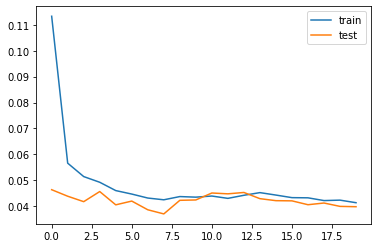

<Figure size 432x288 with 0 Axes>

In [221]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
plt.savefig("training loss 350epochs_5layers")

In [222]:
history.history
print('overall loss' , np.mean(history.history['loss']))
print('overall val_loss' , np.mean(history.history['val_loss']))

overall loss 0.04834657683968544
overall val_loss 0.04219608660787344


In [223]:
predicted_y = model.predict(test_X)


In [224]:
print(predicted_y.shape)
print(test_y.shape)

(524, 60, 2)
(524, 60, 2)


In [225]:
predicted_valence = predicted_y[:,:,0]
predicted_arousal = predicted_y[:,:,1]
test_valence = test_y[:,:,0]
test_arousal = test_y[:,:,1]

In [226]:
# for i in range(1):
  # print(predicted_valence[i])
  # print(predicted_arousal[i])
  # print(test_valence[i])
  # print(test_arousal[i])

In [227]:
predicted_valence = predicted_valence.reshape(31440,)
test_valence = test_valence.reshape(31440,)
predicted_arousal = predicted_arousal.reshape(31440,)
test_arousal = test_arousal.reshape(31440,)

In [228]:
def metrics(y_true,y_pred,name):
  print(name,"")
  mae = mean_absolute_error(y_true,y_pred)
  rmse = sqrt(mean_squared_error(y_true,y_pred))
  r2 = r2_score(y_true,y_pred)
  pearson_corr = pearsonr(y_true,y_pred)
  spearman_corr = spearmanr(y_true,y_pred)
  
  print('RMSE : ',rmse)
  print('Pearson : ',pearson_corr)
  print('MAE : ',mae)
  print('R2 : ',r2)
  print('Spearman : ',spearman_corr,'\n')


In [229]:
def graph_results(x,y,title, xlim=-1, ylim=-1):
  #x and y are variables ( y_pred vs y_true )
  #Important
  plt.scatter(x,y,s=15)

  # if xlim != -1: plt.xlim([0, xlim])
  # if ylim != -1: plt.ylim([0, ylim])
  # plt.gca().set_ylim([1.5,7.5])
  # plt.gca().set_xlim([1.5,9])
  #Fix 
  plt.xlabel("Actual")
  plt.ylabel("Predicted")
  plt.title((title))
  # m, b = np.polyfit(x, y, 1)
  # plt.plot(x, m*x + b, color='red')  
  plt.savefig(title)

  plt.show()

valence 
RMSE :  0.20831692809707303
Pearson :  (0.491756539714903, 0.0)
MAE :  0.16799108776956548
R2 :  0.23552338102142778
Spearman :  SpearmanrResult(correlation=0.49235050609271946, pvalue=0.0) 



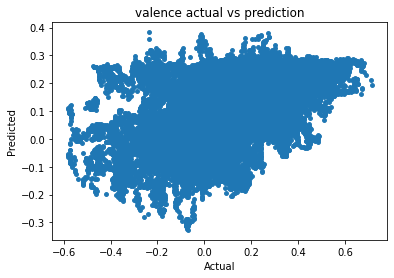

In [230]:
metrics(test_valence,predicted_valence,'valence')
graph_results(test_valence,predicted_valence,'valence actual vs prediction')


arousal 
RMSE :  0.19019188980476862
Pearson :  (0.7617556277344708, 0.0)
MAE :  0.15573972599631897
R2 :  0.5734340341587061
Spearman :  SpearmanrResult(correlation=0.76489677975767, pvalue=0.0) 



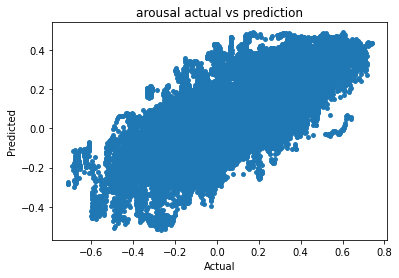

In [231]:
metrics(test_arousal,predicted_arousal,'arousal')
graph_results(test_arousal,predicted_arousal,'arousal actual vs prediction')